In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pingouin as pg

sns.set(rc={'figure.figsize':(20, 10)})
warnings.filterwarnings("ignore")
%matplotlib inline
SEED = 23

In [2]:
dict_group = {
    'num_inf': 'morphological',
     'num_cl': 'syntactic',
     'ndw': 'lexical',
     'corrected_vv': 'lexical',
     'corrected_ttr': 'lexical',
     'lfp_rest': 'lexical',
     'lfp_1000': 'lexical',
     'num_tok': 'syntactic',
     'num_compl_tu': 'syntactic',
     'num_noun_inf': 'syntactic',
     'num_tu': 'syntactic',
     'num_advcl': 'syntactic',
     'num_linkings': 'discursive',
     'num_shell_noun': 'discursive',
     'num_sent': 'syntactic',
     'num_adj_noun': 'syntactic',
     'density': 'lexical',
     'num_4grams': 'discursive',
     'nv': 'lexical',
     'num_rel_cl': 'syntactic',
     'num_coord': 'syntactic',
     'num_func_ngrams': 'discursive',
     'vvii': 'lexical',
     'num_gerunds': 'morphological',
     'lfp_2000': 'lexical',
     'ls': 'lexical',
     'sum_punct': 'l1_interference',
     'num_pres_sing': 'morphological',
     'min_depth': 'syntactic',
     'max_depth': 'syntactic',
     'der_level5': 'morphological',
     'freq_finite_forms': 'morphological',
     'million_mistake': 'l1_interference',
     'lfp_uwl': 'lexical',
     'num_acl': 'syntactic',
     'corrected_vs': 'lexical',
     'num_prep': 'syntactic',
     'der_level6': 'morphological',
     'der_level3': 'morphological',
     'av_tok_before_root': 'syntactic',
     'num_past_simple': 'morphological',
     'num_misspelled_tokens': 'l1_interference',
     'av_len_sent': 'syntactic',
     'lv': 'lexical',
     'num_part_noun': 'syntactic',
     'mci': 'morphological',
     'pos_sim_nei': 'syntactic',
     'freq_aux': 'morphological',
     'adjv': 'lexical',
     'pos_sim_all': 'syntactic',
     'der_level4': 'morphological',
     'num_pres_plur': 'morphological',
     'advv': 'lexical',
    'lemma_sim_nei': 'syntactic',
    'modv': 'lexical',
    'av_depth': 'syntactic',
    'num_past_part': 'morphological',
    'num_poss': 'syntactic',
    'lemma_sim_all': 'syntactic'
}

In [3]:
df = pd.read_csv('/Users/ira/Downloads/REALEC_Inspector/results/classification_dataset.csv')
df['class'] = round(df['class'] / 10).astype(int)
df = df[df['class'] != 1]
df = df.drop(['name', 'text', 'side_mistake',
              'vs', 'squared_vs', 'ttr', 'root_ttr',
              'log_ttr', 'uber_ttr', 'd', 'vvi',
              'squared_vv', 'punct_mistakes_pp',
              'punct_mistakes_because', 'class',
              'punct_mistakes_but', 'punct_mistakes_compare'], axis=1)

df.head(2)

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,num_past_part,num_past_simple,num_linkings,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,million_mistake,type,sum_punct
0,3.56,6,2,2,0,1,18,244,4.39,13.56,...,2,0,5,1,0,0,2,0,1,0
1,5.43,10,4,1,3,1,7,175,6.29,25.00,...,1,4,6,1,0,0,3,0,1,0


In [4]:
def get_info(feature, df):
    mean_1 = round(np.mean(df[df['type'] == 1][feature].to_list()), 3)
    mean_2 = round(np.mean(df[df['type'] == 2][feature].to_list()), 3)
    one_way_anova = pg.anova(data=df, dv=feature, between='type', detailed=True)
    p_value = one_way_anova['p-unc'][0]
    F = one_way_anova['F'][0]
    np2 = one_way_anova['np2'][0]
    return round(p_value, 3), round(F, 3), round(np2, 3), mean_1, mean_2

In [5]:
p_values = []
Fs = []
np2s = []
mean_1s = []
mean_2s = []
groups = []
features = [x for x in df.columns if x != 'type']
for f in features:
    p_value, F, np2, mean_1, mean_2 = get_info(f, df)
    p_values.append(p_value)
    Fs.append(F)
    np2s.append(np2)
    mean_1s.append(mean_1)
    mean_2s.append(mean_2)
    groups.append(dict_group[f])
f_df_anova = pd.DataFrame(data={'F-value': Fs,
                                'p-value': p_values,
                                'partial eta-square': np2s,
                                'feature': features,
                                'graph discription': mean_1s,
                               'opinion': mean_2s,
                               'group': groups})
f_df_anova = f_df_anova.sort_values(['F-value', 'partial eta-square'], ascending=[0, 0])
f_df_anova = f_df_anova.set_index('feature')

In [6]:
f_df_anova[f_df_anova['group'] == 'syntactic']

,F-value,p-value,partial eta-square,graph discription,opinion,group
feature,,,,,,
num_cl,4860.822,0.000,0.586,15.007,30.043,syntactic
num_tok,2809.070,0.000,0.450,203.904,308.253,syntactic
num_compl_tu,2738.380,0.000,0.443,3.499,10.384,syntactic
num_noun_inf,2320.430,0.000,0.403,0.464,3.054,syntactic
num_tu,2306.714,0.000,0.402,11.508,19.659,syntactic
num_advcl,2179.311,0.000,0.388,2.546,6.849,syntactic
num_sent,1982.555,0.000,0.366,9.743,15.183,syntactic
num_adj_noun,1972.153,0.000,0.365,10.497,19.077,syntactic
num_rel_cl,991.361,0.000,0.224,1.409,3.509,syntactic


# No difference

In [7]:
no_diff = f_df_anova[f_df_anova['p-value'] >= 0.05]
no_diff.head()

,F-value,p-value,partial eta-square,graph discription,opinion,group
feature,,,,,,
lemma_sim_nei,2.598,0.107,0.001,23.454,23.115,syntactic
modv,1.437,0.231,0.000,0.220,0.221,lexical
av_depth,1.067,0.302,0.000,4.640,4.671,syntactic
num_past_part,0.375,0.540,0.000,4.517,4.447,morphological
num_poss,0.045,0.832,0.000,14.807,14.766,syntactic


In [8]:
no_diff_graph = no_diff
no_diff_graph['feature'] = no_diff_graph.index
no_diff_graph = no_diff_graph[['graph discription', 'opinion', "feature"]]
no_diff_graph = pd.melt(no_diff_graph, id_vars="feature", var_name="type", value_name="mean")
no_diff_graph.head()

,feature,type,mean
0,lemma_sim_nei,graph discription,23.454
1,modv,graph discription,0.220
2,av_depth,graph discription,4.640
3,num_past_part,graph discription,4.517
4,num_poss,graph discription,14.807


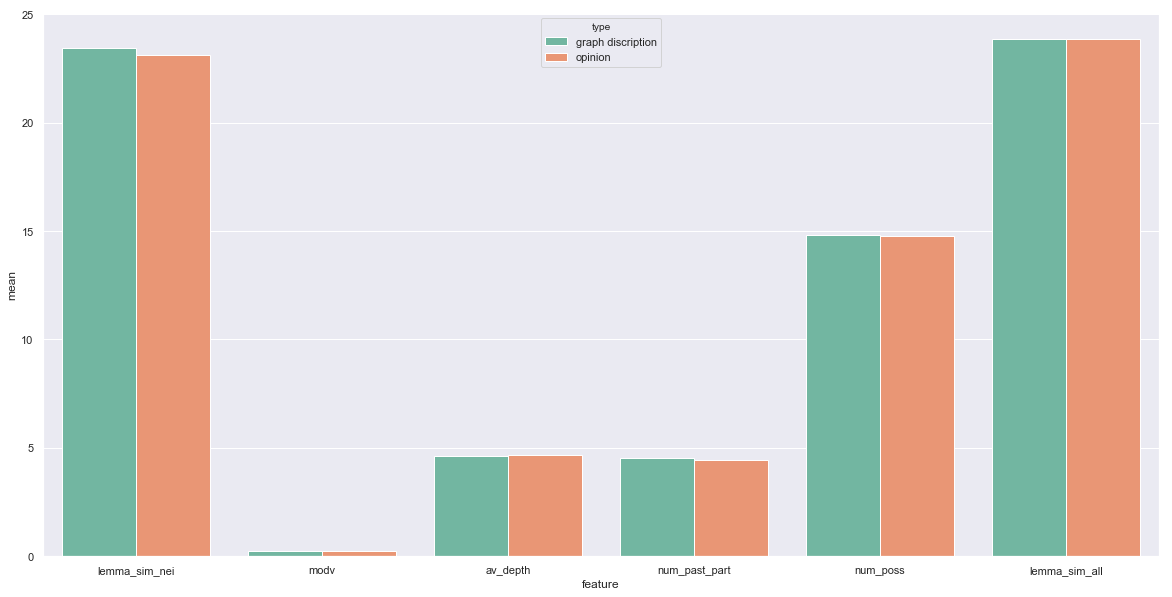

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=no_diff_graph, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/no_difference.png')

# Difference

In [10]:
diff = f_df_anova[f_df_anova['p-value'] < 0.05]
diff.head()

,F-value,p-value,partial eta-square,graph discription,opinion,group
feature,,,,,,
num_inf,6697.371,0.0,0.661,3.205,15.999,morphological
num_cl,4860.822,0.0,0.586,15.007,30.043,syntactic
ndw,4441.362,0.0,0.564,88.952,138.450,lexical
corrected_vv,4207.610,0.0,0.550,1.975,3.042,lexical
corrected_ttr,3787.690,0.0,0.524,4.415,5.580,lexical


In [11]:
diff_graph = diff
diff_graph['feature'] = diff_graph.index
diff_graph = diff_graph[['graph discription', 'opinion', "feature", 'group']]

In [12]:
diff_graph.head()

,graph discription,opinion,feature,group
feature,,,,
num_inf,3.205,15.999,num_inf,morphological
num_cl,15.007,30.043,num_cl,syntactic
ndw,88.952,138.450,ndw,lexical
corrected_vv,1.975,3.042,corrected_vv,lexical
corrected_ttr,4.415,5.580,corrected_ttr,lexical


## Lexical

In [13]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'lexical']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="type", value_name="mean")
diff_graph_lex.head()

,feature,type,mean
0,ndw,graph discription,88.952
1,corrected_vv,graph discription,1.975
2,corrected_ttr,graph discription,4.415
3,lfp_rest,graph discription,0.258
4,lfp_1000,graph discription,0.616


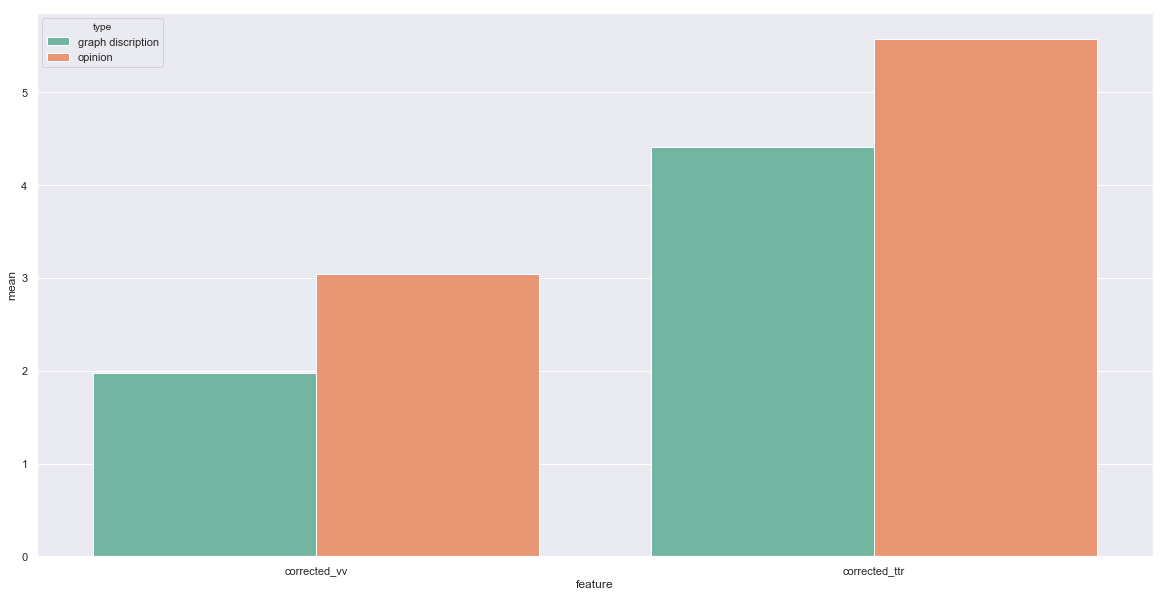

In [14]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'].isin(['corrected_vv', 'corrected_ttr'])]
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/difference_vv_ttr.png')

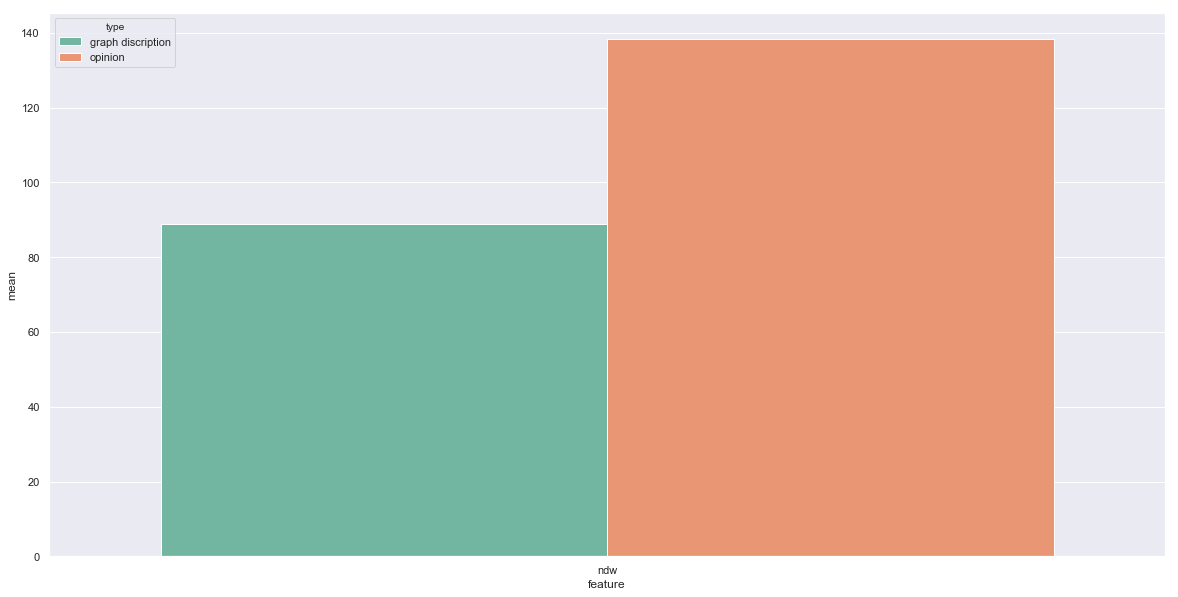

In [15]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'].isin(['ndw'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/difference_ndw.png')

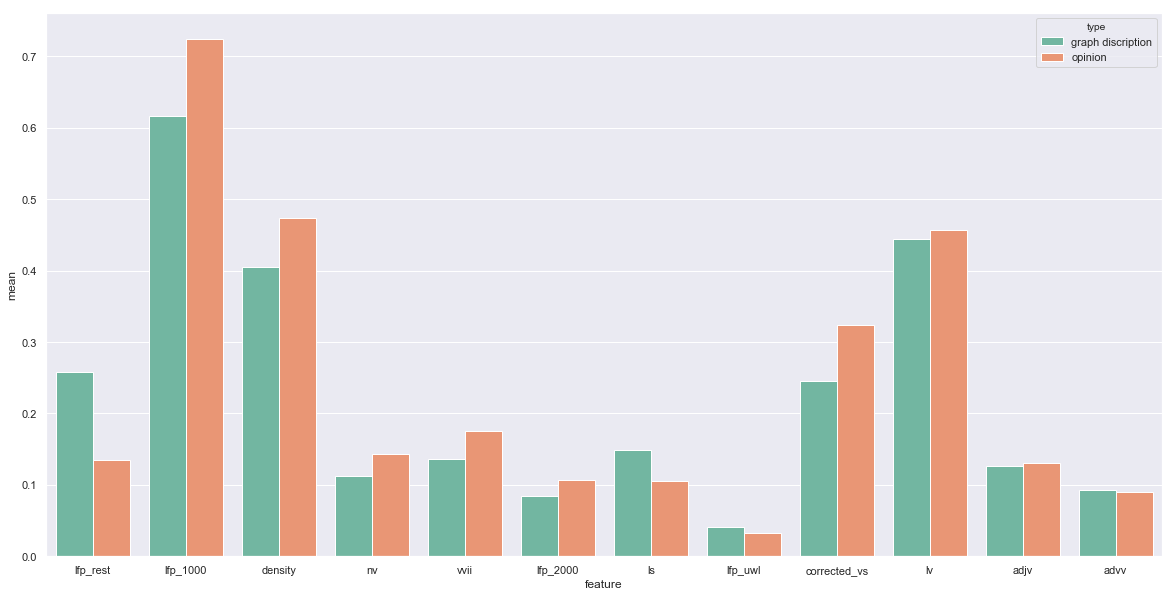

In [16]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'] != 'ndw']
_diff_graph_lex = _diff_graph_lex[diff_graph_lex['feature'] != 'corrected_vv']
_diff_graph_lex = _diff_graph_lex[diff_graph_lex['feature'] != 'corrected_ttr']
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/difference_rest_lex.png')

## Morhological

In [17]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'morphological']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="type", value_name="mean")
diff_graph_lex.head()

,feature,type,mean
0,num_inf,graph discription,3.205
1,num_gerunds,graph discription,1.395
2,num_pres_sing,graph discription,6.075
3,der_level5,graph discription,0.045
4,freq_finite_forms,graph discription,0.454


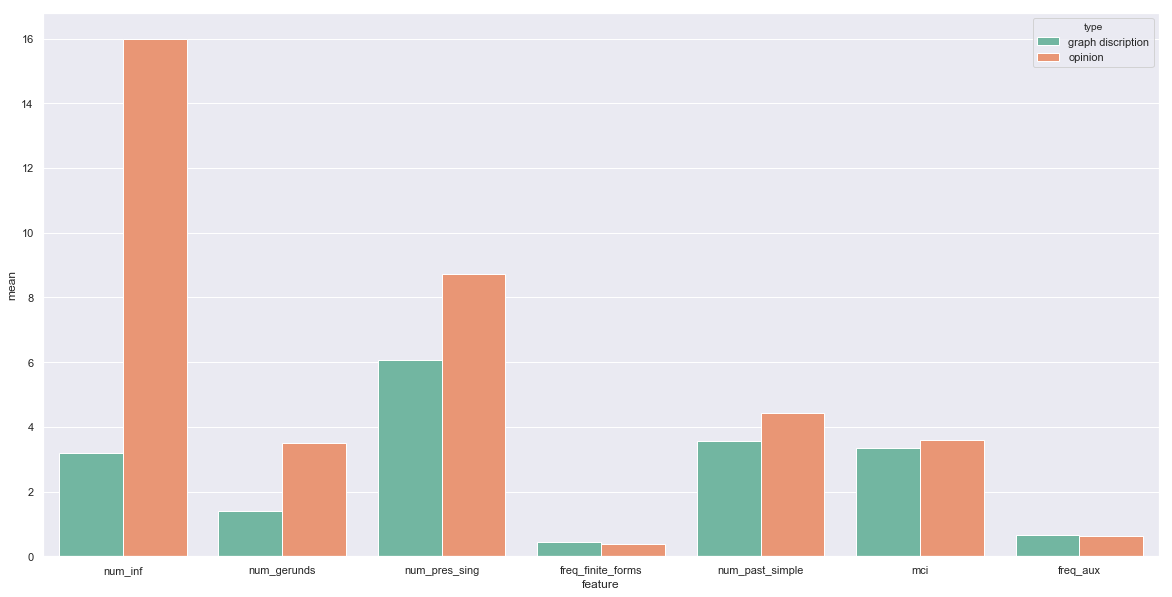

In [18]:
_diff_graph_lex = diff_graph_lex[diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/difference_rest_morph_1.png')

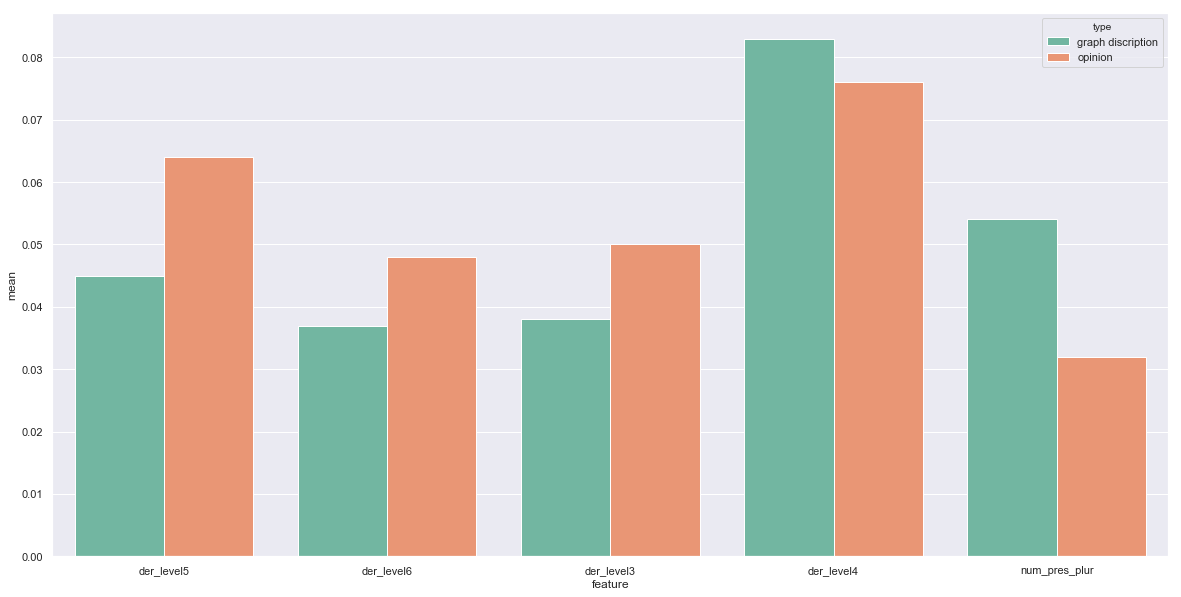

In [19]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/difference_rest_morph_2.png')

## Syntactic

In [20]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'syntactic']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="type", value_name="mean")
diff_graph_lex.head()

,feature,type,mean
0,num_cl,graph discription,15.007
1,num_tok,graph discription,203.904
2,num_compl_tu,graph discription,3.499
3,num_noun_inf,graph discription,0.464
4,num_tu,graph discription,11.508


In [21]:
diff_graph_lex['feature']

0                 num_cl
1                num_tok
2           num_compl_tu
3           num_noun_inf
4                 num_tu
5              num_advcl
6               num_sent
7           num_adj_noun
8             num_rel_cl
9              num_coord
10             min_depth
11             max_depth
12               num_acl
13              num_prep
14    av_tok_before_root
15           av_len_sent
16         num_part_noun
17           pos_sim_nei
18           pos_sim_all
19                num_cl
20               num_tok
21          num_compl_tu
22          num_noun_inf
23                num_tu
24             num_advcl
25              num_sent
26          num_adj_noun
27            num_rel_cl
28             num_coord
29             min_depth
30             max_depth
31               num_acl
32              num_prep
33    av_tok_before_root
34           av_len_sent
35         num_part_noun
36           pos_sim_nei
37           pos_sim_all
Name: feature, dtype: object

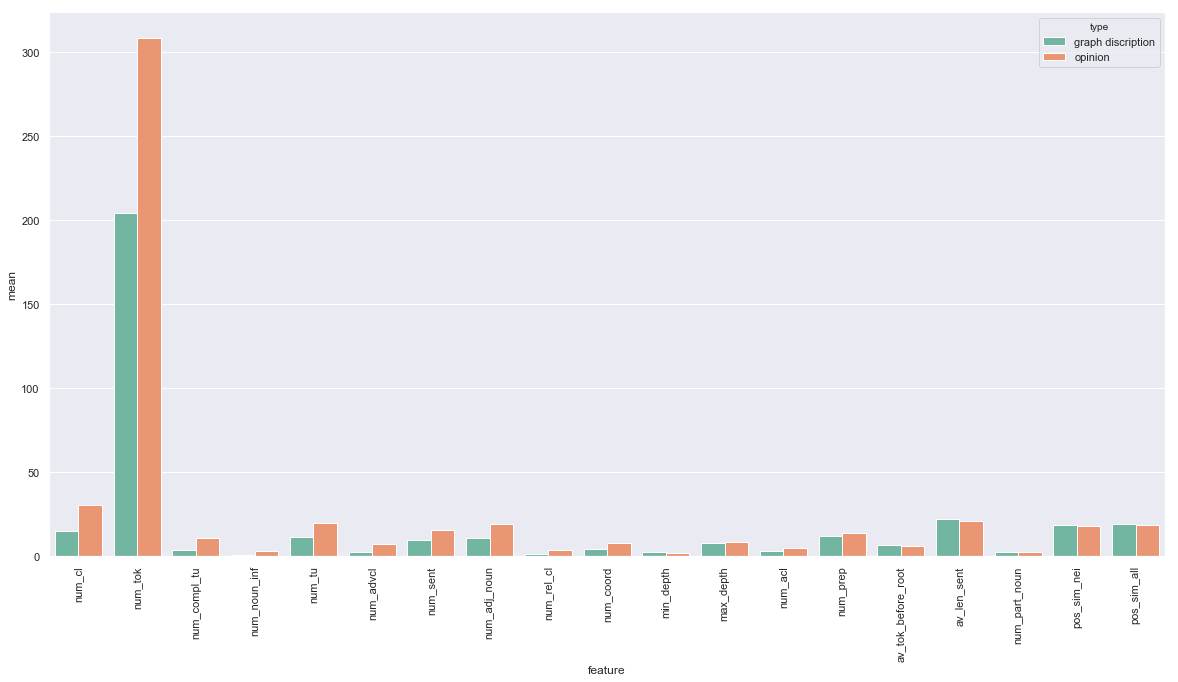

In [20]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
loc, labels = plt.xticks()
sns_plt.set_xticklabels(labels, rotation=90)
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/difference_syntactic.png')

## Discursive

In [21]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'discursive']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="type", value_name="mean")
diff_graph_lex.head()

,feature,type,mean
0,num_linkings,graph discription,7.507
1,num_shell_noun,graph discription,0.687
2,num_4grams,graph discription,3.582
3,num_func_ngrams,graph discription,0.526
4,num_linkings,opinion,15.958


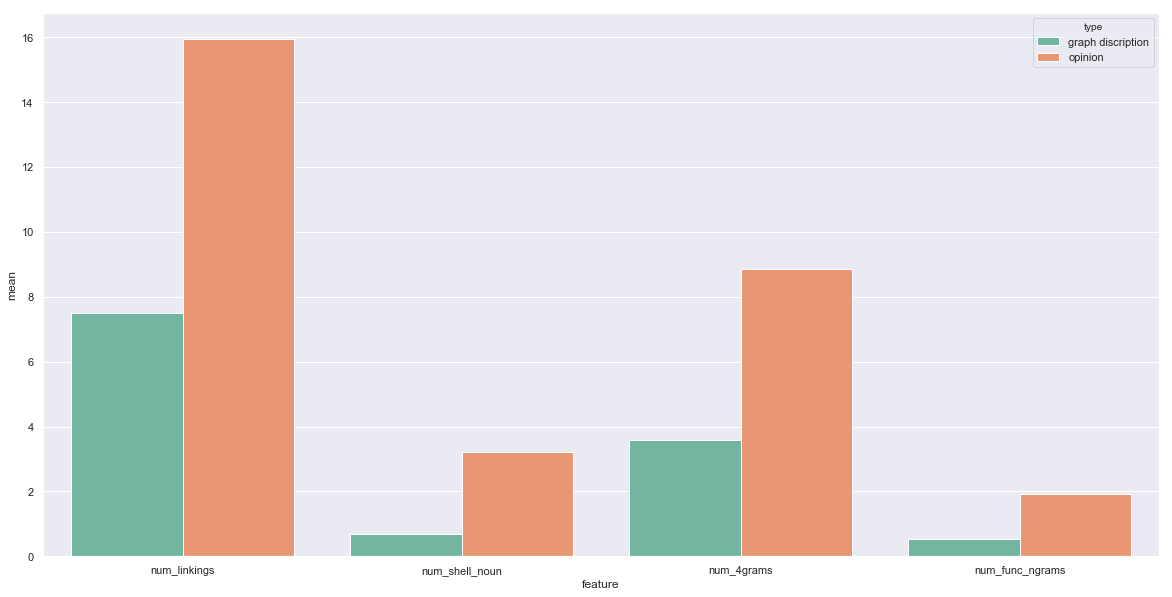

In [23]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/discursive.png')

## L1 Interference

In [25]:
diff_graph_lex = diff_graph[diff_graph['group'] == 'l1_interference']
diff_graph_lex = diff_graph_lex.drop(['group'], axis=1)
diff_graph_lex = pd.melt(diff_graph_lex, id_vars="feature", var_name="type", value_name="mean")
diff_graph_lex.head()

,feature,type,mean
0,sum_punct,graph discription,0.540
1,million_mistake,graph discription,0.518
2,num_misspelled_tokens,graph discription,2.823
3,sum_punct,opinion,1.383
4,million_mistake,opinion,0.005


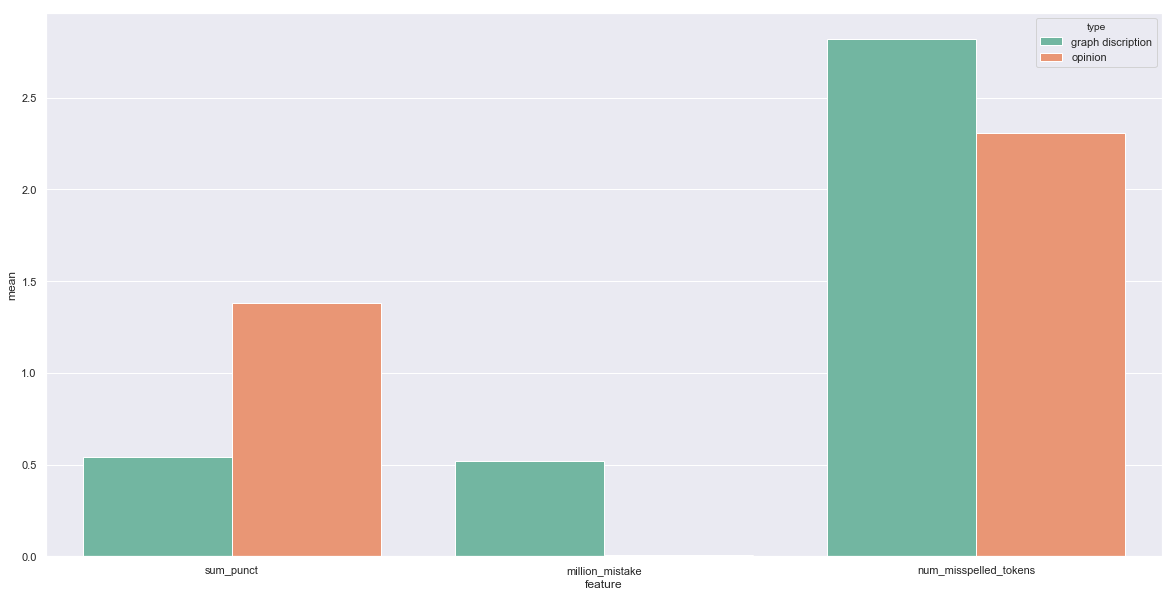

In [27]:
_diff_graph_lex = diff_graph_lex[~diff_graph_lex['feature'].isin(['num_inf', 'num_gerunds',
                                                                 'num_pres_sing', 'num_past_simple',
                                                                 'mci', 'freq_aux', 'freq_finite_forms'])]
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.barplot(x="feature", y="mean", hue="type", data=_diff_graph_lex, palette="Set2")
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/type_difference/l1.png')